In [5]:
# Імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

x_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)


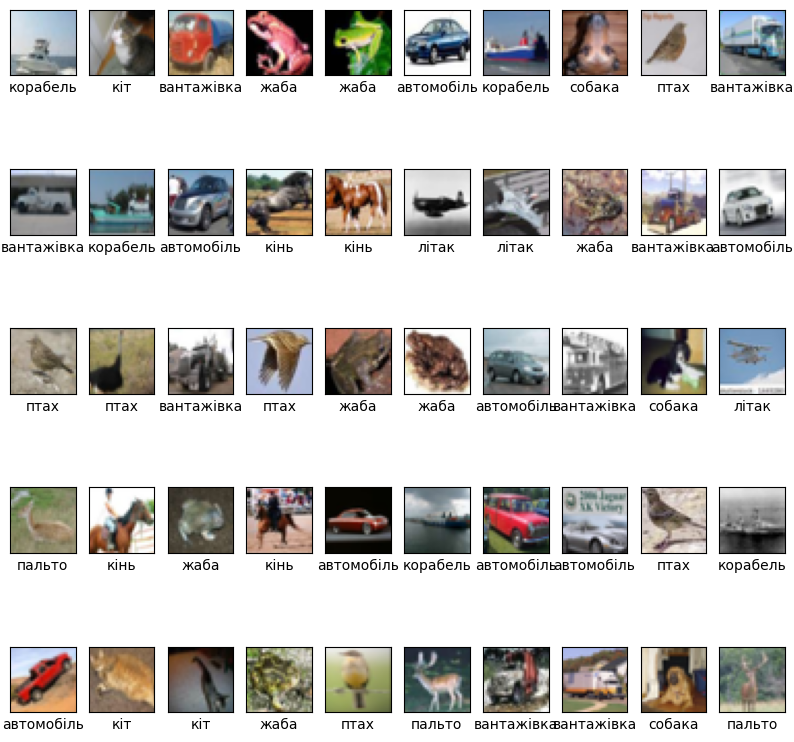

In [10]:
# Завантаження та розділення датасету
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

y_train = y_train.flatten()


classes = ['літак', 'автомобіль', 'птах', 'кіт', 'пальто', 'собака', 'жаба', 'кінь', 'корабель', 'вантажівка']

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])



In [15]:
# Нормалізація даних
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Перетворення міток в категоріальні дані
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:
# Будівництво моделі
model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Плоский шар для згладжування зображення
    layers.Dense(128, activation="relu"),   # Повністю з'єднаний шар з 128 вузлами
    layers.Dense(64, activation="relu"),    # Повністю з'єднаний шар з 64 вузлами
    layers.Dense(32, activation="relu"),    # Повністю з'єднаний шар з 32 вузлами
    layers.Dense(10, activation="softmax")  # Вихідний шар з 10 вузлами та функцією активації softmax
])

# Компіляція моделі
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Виведення інформації про модель
model.summary()

# Тренування моделі
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               393344    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 404010 (1.54 MB)
Trainable params: 404010 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1250/12

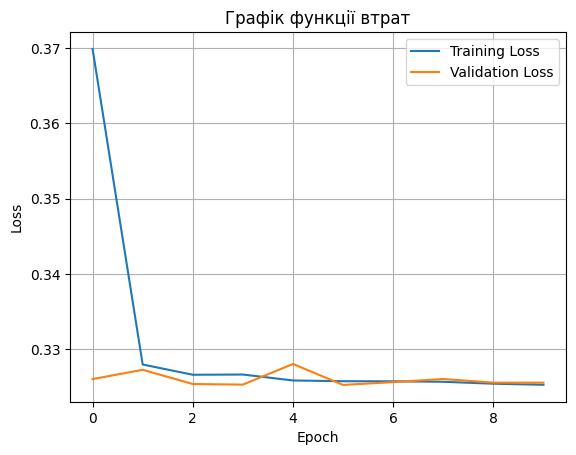

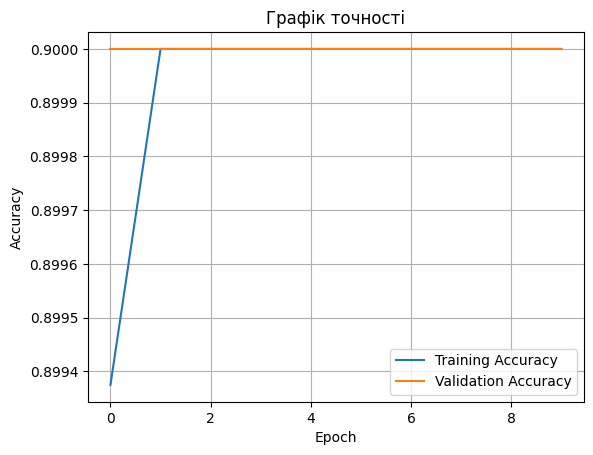

In [17]:
# Виведення графіків функції втрат та точності
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Графік функції втрат")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Графік точності")
plt.grid()
plt.legend()
plt.show()



In [24]:
from keras.utils import to_categorical

# Оцінка точності на тестовому наборі
x_test_flat = x_test.reshape((x_test.shape[0], -1))
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, batch_size=32, verbose=2)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")

# Розпізнавання 10 випадкових зображень
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)
random_images = x_test[random_indices]
predictions = model.predict(random_images)

# Виведення результатів розпізнавання
for i in range(10):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[random_indices[i]])
    print(f"Image {i + 1}: Predicted Class {predicted_class}, True Class {true_class}")

# Виведення зображень для перевірки
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"True: {true_class}, Predicted: {predicted_class}")
    plt.axis('off')
plt.show()

(10000, 32, 32, 3, 10)


InvalidArgumentError: Graph execution error:

Detected at node sequential_3/dense_12/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/traitlets/config/application.py", line 1046, in launch_instance

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/opt/homebrew/Cellar/python@3.11/3.11.4/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/opt/homebrew/Cellar/python@3.11/3.11.4/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/opt/homebrew/Cellar/python@3.11/3.11.4/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/28/3bsswxln29d87lyvxzq89hyh0000gp/T/ipykernel_61841/3041234161.py", line 7, in <module>

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/engine/training.py", line 2272, in evaluate

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/engine/training.py", line 4079, in run_step

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/engine/training.py", line 2042, in test_function

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/engine/training.py", line 2025, in step_function

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/engine/training.py", line 2013, in run_step

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/engine/training.py", line 1893, in test_step

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/engine/training.py", line 589, in __call__

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/layers/core/dense.py", line 255, in call

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/activations.py", line 306, in relu

  File "/Users/vladyslav2/Library/Python/3.11/lib/python/site-packages/keras/src/backend.py", line 5397, in relu

Matrix size-incompatible: In[0]: [32,30720], In[1]: [3072,128]
	 [[{{node sequential_3/dense_12/Relu}}]] [Op:__inference_test_function_65285]

In [12]:
# Виведення статистики моделі
print("\nModel Evaluation:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Статистика параметрів моделі
total_parameters = sum([np.prod(layer.get_weights()[i].shape) for layer in model.layers for i in range(len(layer.get_weights()))])

print(f"\nTotal Parameters: {total_parameters}")

# Статистика шарів моделі
for i, layer in enumerate(model.layers):
    print(f"\nLayer {i + 1}: {layer.name}")
    print(f"Number of Parameters: {layer.count_params()}")
    print(f"Input Shape: {layer.input_shape}, Output Shape: {layer.output_shape}")



Model Evaluation:
Test Loss: 0.3819
Test Accuracy: 87.50%

Total Parameters: 111146

Layer 1: flatten_1
Number of Parameters: 0
Input Shape: (None, 28, 28), Output Shape: (None, 784)

Layer 2: dense_4
Number of Parameters: 100480
Input Shape: (None, 784), Output Shape: (None, 128)

Layer 3: dense_5
Number of Parameters: 8256
Input Shape: (None, 128), Output Shape: (None, 64)

Layer 4: dense_6
Number of Parameters: 2080
Input Shape: (None, 64), Output Shape: (None, 32)

Layer 5: dense_7
Number of Parameters: 330
Input Shape: (None, 32), Output Shape: (None, 10)
